## Table of Contents

- [Distribution of Churn across features](#distribution-of-churn-across-features)
    - [Customer ID](#customer-id)
    - [Age](#age)
    - [Gender](#gender)
    - [Tenure](#tenure)
    - [Usage Frequency](#usage-frequency)
    - [Support Calls](#support-calls)
    - [Subscription Types](#subscription-type)
    - [Payment Delays](#payment-delay)
    - [Contract Length](#contract-length)
    - [Total Spend](#total-spend)
- [Interim Data Staging](#interim-data-staging)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set seed for reproducibility
np.random.seed(0) 

train = pd.read_parquet('data/training_2.pq')
test = pd.read_parquet('data/testing_2.pq')

# Distribution of Churn across features

Up until now, we have done the following:
- fixed data quality issues
- handled missing values
- compared distributions between training and test datasets

With this notebook, the aim is to develop a visual understanding of the relation between churn and other predictors.

### Customer ID

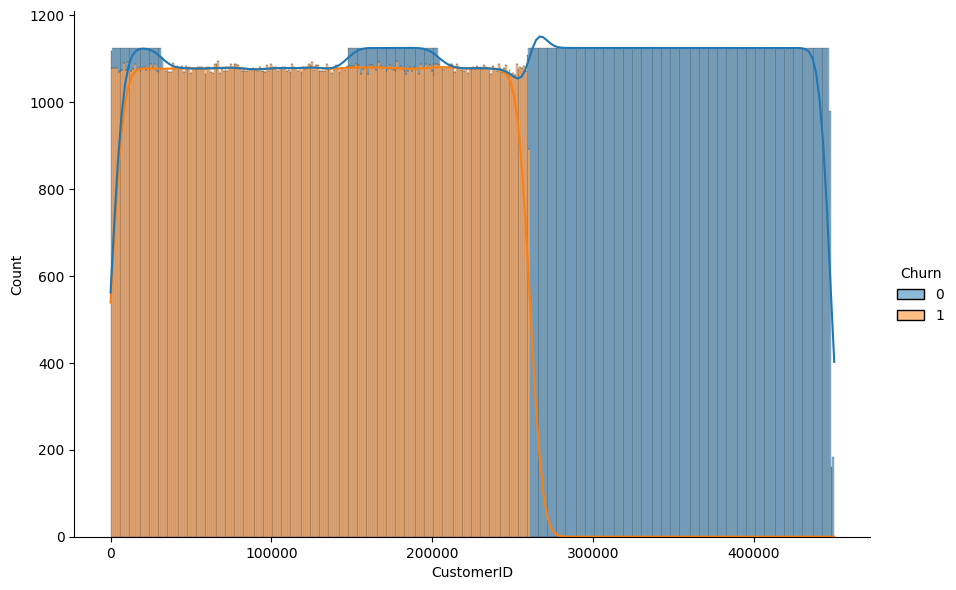

In [2]:
num_bins=400 #int((train.CustomerID.max()-train.CustomerID.min())*2)
p = sns.displot(train, x='CustomerID', hue='Churn', kde=True, height=6, aspect=1.5, multiple='stack', bins=num_bins)
p.fig.set_dpi(100)

Assuming customer IDs monotonically increase with time, there is a point in the history of the company after which customers stopped churning ;) Maybe because there all still under contract so hadn't had a chance to churn even if they wanted to? But also a possibility this is an artificial cut exclusively related to the design of the dataset.

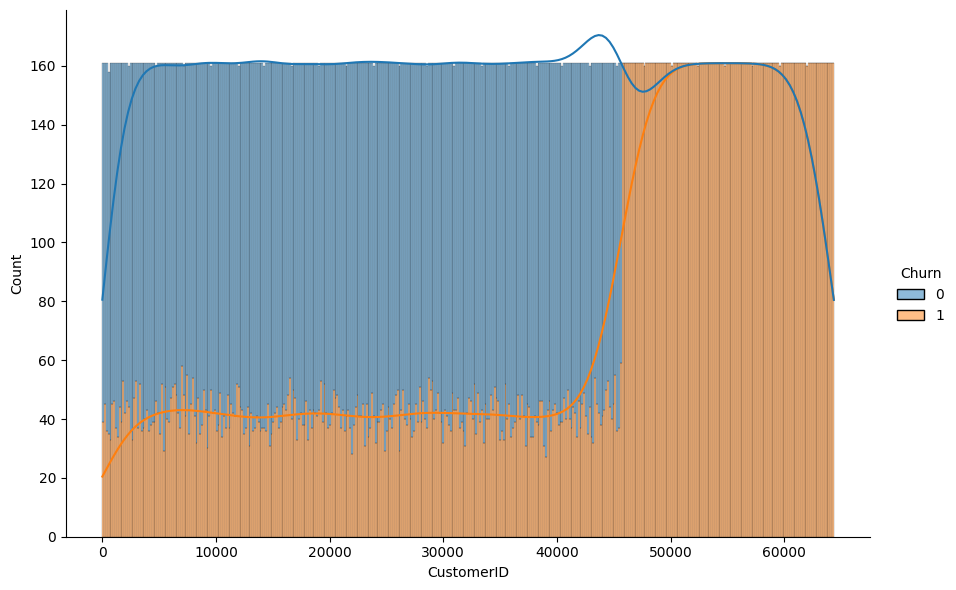

In [3]:
num_bins=400 #int((train.CustomerID.max()-train.CustomerID.min())*2)
p = sns.displot(test, x='CustomerID', hue='Churn', kde=True, height=6, aspect=1.5, multiple='stack', bins=num_bins)
p.fig.set_dpi(100)

If the Customer ID are consistent between training and test data, then the split seen on the test set is inconsistent with the split noticed on the training set. It also shows any model trained in cross-validated way on K folds of training set should use shuffled data.

In [6]:
merged = pd.merge(train, test, on="CustomerID")
merged.CustomerID.count()

62992

In [7]:
test.CustomerID.count()

64371

We have 62992 common Customer IDs between training and test sets. Which is almost the entire size of the test set. That does not bode well for an out of sample test set.

In [11]:
(merged.TotalSpend_x == merged.TotalSpend_y).sum()

75

That said only 75 of them have the same Total Spend, so we know they are not the same people, and the Customer IDs should be ignored. 

### Age

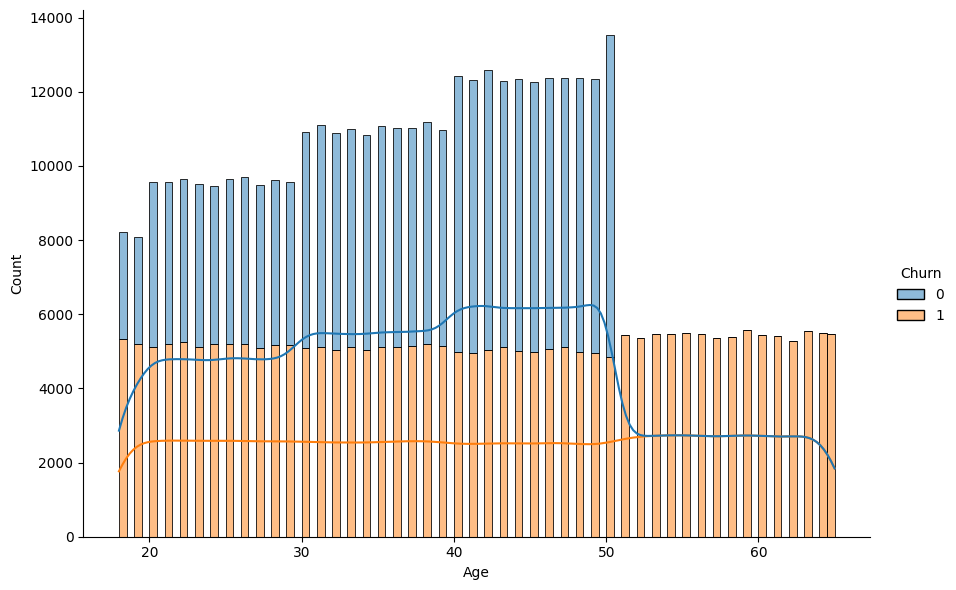

In [176]:
num_bins=int((train.Age.max()-train.Age.min())*2)
p = sns.displot(train, x='Age', hue='Churn', kde=True, height=6, aspect=1.5, multiple='stack', bins=num_bins)
p.fig.set_dpi(100)

In [198]:
binning = np.histogram(train.Age, bins=num_bins)
binning

(array([ 8219,     0,  8073,     0,  9553,     0,  9574,     0,  9639,
            0,  9513,     0,  9465,     0,  9647,     0,  9692,     0,
         9472,     0,  9608,     0,  9571,     0, 10907,     0, 11092,
            0, 10885,     0, 10990,     0, 10829,     0, 11062,     0,
        11031,     0, 11024,     0, 11181,     0, 10961,     0, 12417,
            0, 12314,     0, 12578,     0, 12298,     0, 12344,     0,
        12265,     0, 12368,     0, 12369,     0, 12379,     0, 12331,
            0, 13527,     0,  5437,     0,  5364,     0,  5467,     0,
         5472,     0,  5489,     0,  5477,     0,  5361,     0,  5373,
            0,  5573,     0,  5430,     0,  5407,     0,  5288,     0,
         5560,     0,  5496,  5460]),
 array([18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5, 23. ,
        23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5,
        29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. ,
        34.5, 35. , 35.5, 36. 

In [199]:
pd.set_option('display.max_rows', None)
pd.DataFrame({"Age": binning[1],"Count":[*[0],*binning[0]]})

,Age,Count
0,18.0,0
1,18.5,8219
2,19.0,0
3,19.5,8073
4,20.0,0
5,20.5,9553
6,21.0,0
7,21.5,9574
8,22.0,0
9,22.5,9639


This series helps us precisely identify the points at which step-wise jumps happen, and we can use those levels to derive a categorical variable for Age.

In [194]:
bins = [18,20,30,40,50,51,65.5]
train['AgeCat']=pd.cut(train.Age, bins=bins, labels=['Teens','Twenties','Thirties','Forties','Fifty','Older'], right=False) # stay consistent with np.histogram
test['AgeCat']=pd.cut(test.Age, bins=bins, labels=['Teens','Twenties','Thirties','Forties','Fifty','Older'], right=False)

In [196]:
churn_by_cat = train.groupby('AgeCat').Churn.value_counts(normalize=True)
print(churn_by_cat)

AgeCat    Churn
Teens     1        0.646084
          0        0.353916
Twenties  1        0.539693
          0        0.460307
Thirties  0        0.534894
          1        0.465106
Forties   0        0.594293
          1        0.405707
Fifty     0        0.642419
          1        0.357581
Older     1        1.000000
          0        0.000000
Name: proportion, dtype: float64


There are churners of all ages, distributed quite evenly across age groups. On the contrary, there is a sudden disappearance of older people (>50) among loyal customers. It does seem very strange that we can't find a loyal person above age 50, as if the dataset had been truncated or voluntarily imbalanced. Other than that, 64.6% of teens are churning, and this ratio improves in a step-wise fashion from one age group to the following, to culminate with the single age category of people aged 50 exactly (64.2% are loyal).

<Axes: xlabel='AgeCat', ylabel='count'>

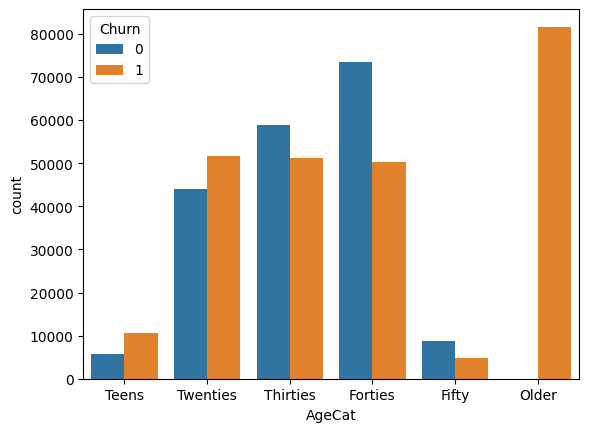

In [201]:
sns.countplot(train ,x='AgeCat', hue='Churn')

Each of these age groups brings its own retention characteristics. Having this binning in place might help downstream modelling tasks.

### Gender

<Axes: xlabel='Gender', ylabel='count'>

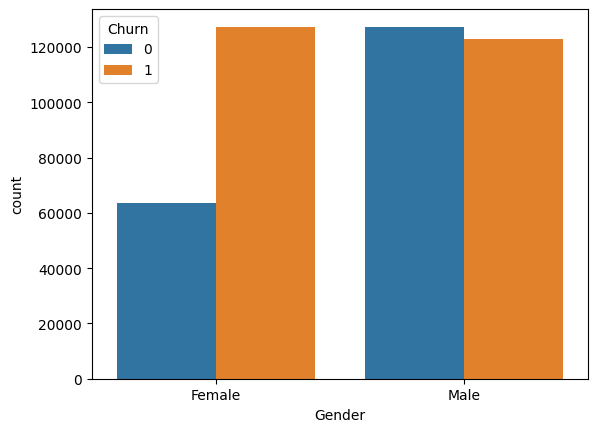

In [117]:
sns.countplot(train, x='Gender', hue='Churn')

In [118]:
churn_by_cat = train.groupby('Gender').Churn.value_counts(normalize=True)
print(churn_by_cat)
churn_by_cat['Female'][1], churn_by_cat['Male'][1]


Gender  Churn
Female  1        0.666691
        0        0.333309
Male    0        0.508731
        1        0.491269
Name: proportion, dtype: float64


(0.6666911533214398, 0.4912688010485431)

Women have a higher propensity to churn (2/3) than men (49%).

### Tenure

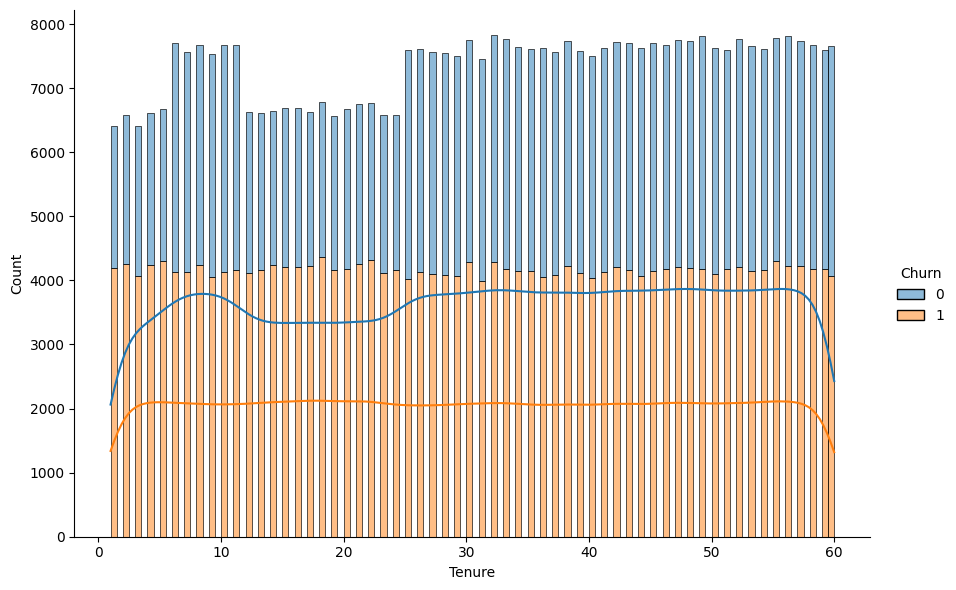

In [202]:
num_bins=int((train.Tenure.max()-train.Tenure.min())*2)
p = sns.displot(train, x='Tenure', hue='Churn', kde=True, height=6, aspect=1.5, multiple='stack', bins=num_bins)
p.fig.set_dpi(100)

In [204]:
binning = np.histogram(train.Tenure, bins=num_bins)
pd.set_option('display.max_rows', None)
pd.DataFrame({"Tenure": binning[1],"Count":[*[0],*binning[0]]})

,Age,Count
0,1.0,0
1,1.5,6407
2,2.0,0
3,2.5,6575
4,3.0,0
5,3.5,6417
6,4.0,0
7,4.5,6606
8,5.0,0
9,5.5,6669


In [205]:
# upon visual inspection of step changes in dataframe above, I am able to define a binning schedule
bins = [0,6,12,25,60.5]
train['TenureCat']=pd.cut(train.Tenure, bins=bins, labels=['HalfYear','Year','TwoYear','Longer'], right=False)
test['TenureCat']=pd.cut(test.Tenure, bins=bins, labels=['HalfYear','Year','TwoYear','Longer'], right=False)

In [207]:
churn_by_cat = train.groupby('TenureCat').Churn.value_counts(normalize=True)
print(churn_by_cat)

TenureCat  Churn
HalfYear   1        0.644335
           0        0.355665
Year       1        0.541945
           0        0.458055
TwoYear    1        0.631767
           0        0.368233
Longer     1        0.541830
           0        0.458170
Name: proportion, dtype: float64


The HalfYear and TwoYear categories have similar breakdowns, with 64% churn. The Year and Longer categories are more balanced with ~ 54% churn.

<Axes: xlabel='TenureCat', ylabel='count'>

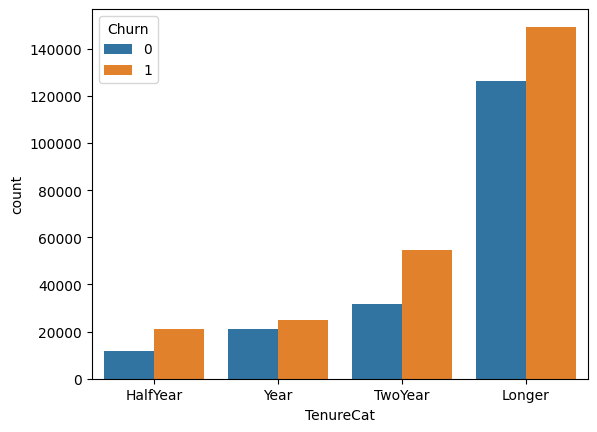

In [208]:
sns.countplot(train, x='TenureCat', hue='Churn')

### Usage Frequency

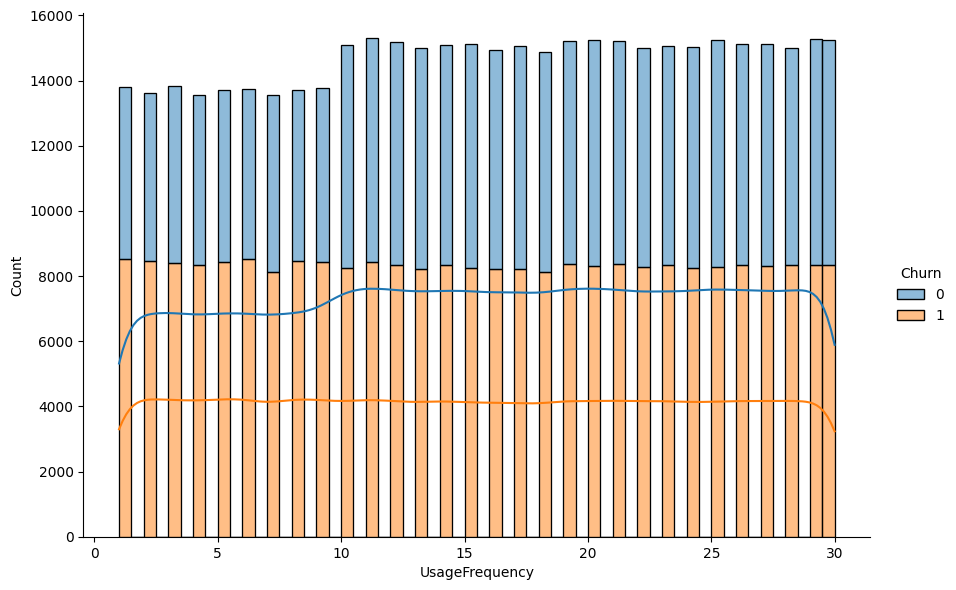

In [209]:
num_bins=int((train.UsageFrequency.max()-train.UsageFrequency.min())*2)
p = sns.displot(train, x='UsageFrequency', hue='Churn', kde=True, height=6, aspect=1.5, multiple='stack', bins=num_bins)
p.fig.set_dpi(100)

In [212]:
bins = [0,10,30.5]
train['UsageFrequencyCat']=pd.cut(train.UsageFrequency, bins=bins, labels=['TenLess','Frequent'], right=False)
test['UsageFrequencyCat']=pd.cut(test.UsageFrequency, bins=bins, labels=['TenLess','Frequent'], right=False)

In [214]:
churn_by_cat = train.groupby('UsageFrequencyCat').Churn.value_counts(normalize=True)
print(churn_by_cat)

UsageFrequencyCat  Churn
TenLess            1        0.613675
                   0        0.386325
Frequent           1        0.549018
                   0        0.450982
Name: proportion, dtype: float64


The customers with usage frequency strictly less than 10 tend to churn more than frequent users.

<Axes: xlabel='UsageFrequencyCat', ylabel='count'>

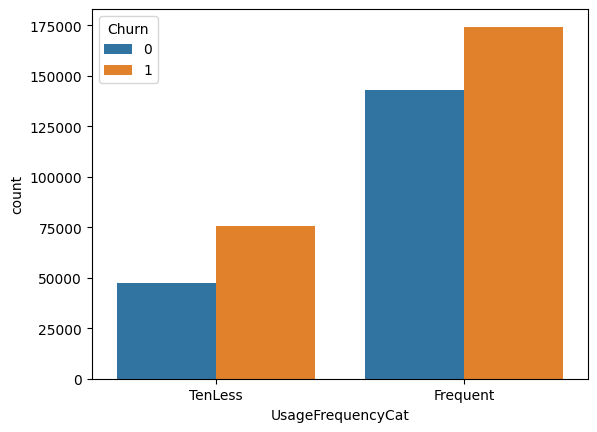

In [213]:
sns.countplot(train ,x='UsageFrequencyCat',hue='Churn')

### Support Calls

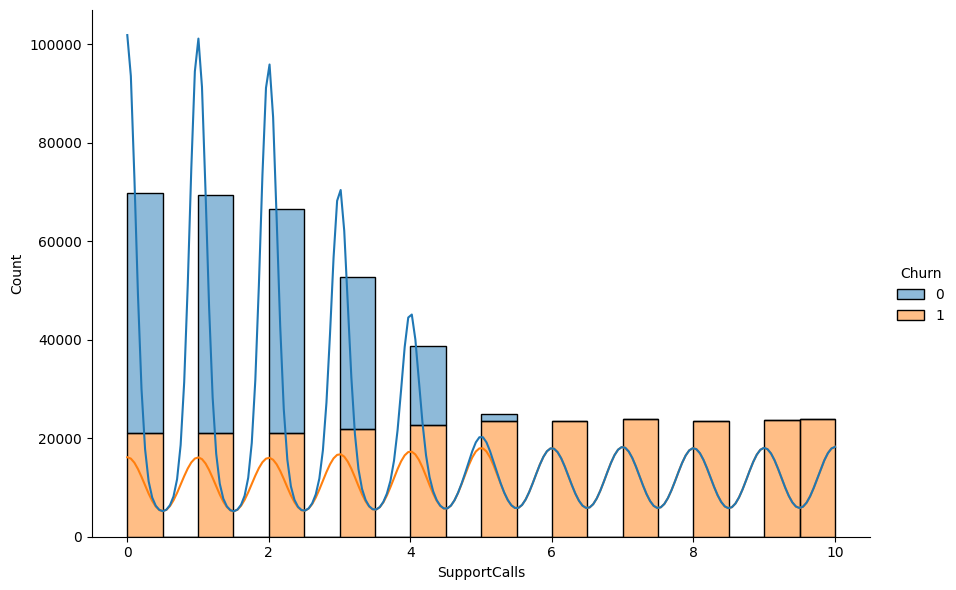

In [218]:
num_bins=int((train.SupportCalls.max()-train.SupportCalls.min())*2)
p = sns.displot(train, x='SupportCalls', hue='Churn', kde=True, height=6, aspect=1.5, multiple='stack', bins=num_bins)
p.fig.set_dpi(100)

In [219]:
binning = np.histogram(train.SupportCalls, bins=num_bins)
pd.set_option('display.max_rows', None)
pd.DataFrame({"SupportCalls": binning[1],"Count":[*[0],*binning[0]]})

,Age,Count
0,0.0,0
1,0.5,69875
2,1.0,0
3,1.5,69476
4,2.0,0
5,2.5,66571
6,3.0,0
7,3.5,52729
8,4.0,0
9,4.5,38750


In [220]:
bins = [0,5,10.5]
train['SupportCallsCat']=pd.cut(train.SupportCalls, bins=bins, labels=['FiveLess','Frequent'], right=False)
test['SupportCallsCat']=pd.cut(test.SupportCalls, bins=bins, labels=['FiveLess','Frequent'], right=False)

In [221]:
churn_by_cat = train.groupby('SupportCallsCat').Churn.value_counts(normalize=True)
print(churn_by_cat)

SupportCallsCat  Churn
FiveLess         0        0.637241
                 1        0.362759
Frequent         1        0.990818
                 0        0.009182
Name: proportion, dtype: float64


Customers having 5 support calls and more seems to be strongly associated with churn (99% churners vs 36.2% for less than 5 calls).

### Payment Delay

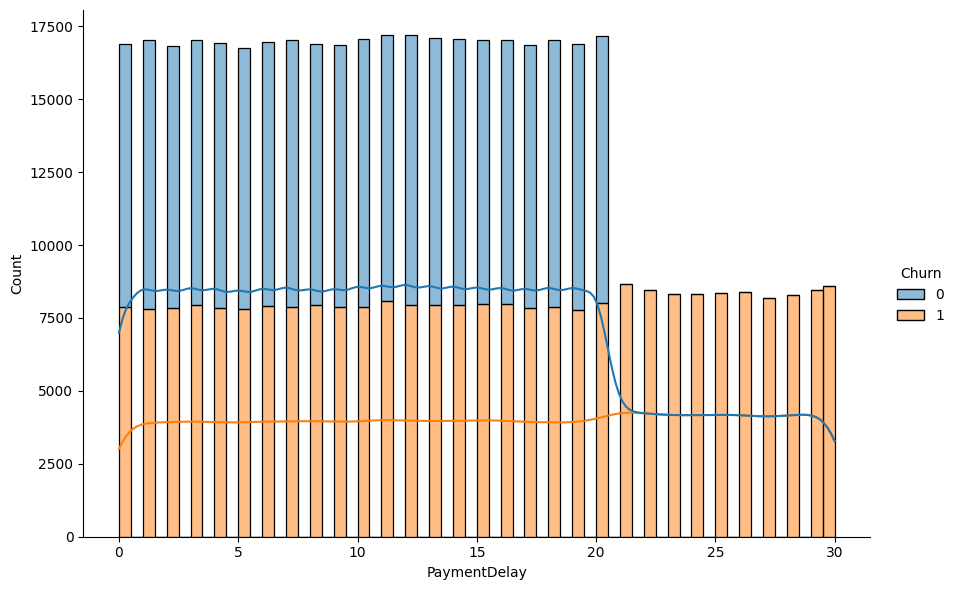

In [222]:
num_bins=int((train.PaymentDelay.max()-train.PaymentDelay.min())*2)
p = sns.displot(train, x='PaymentDelay', hue='Churn', kde=True, height=6, aspect=1.5, multiple='stack', bins=num_bins)
p.fig.set_dpi(100)

In [224]:
binning = np.histogram(train.PaymentDelay, bins=num_bins)
pd.set_option('display.max_rows', None)
pd.DataFrame({"PaymentDelay": binning[1],"Count":[*[0],*binning[0]]})

,PaymentDelay,Count
0,0.0,0
1,0.5,16904
2,1.0,0
3,1.5,17021
4,2.0,0
5,2.5,16822
6,3.0,0
7,3.5,17025
8,4.0,0
9,4.5,16938


Customers having 21 Payment Delays and more seems to be a very strong indicator of churn! This could be related to 2 year contracts arriving at their term, as we already saw a similar cut in the Tenure data at 25 months.

In [225]:
bins = [0,21,30.5]
train['PaymentDelayCat']=pd.cut(train.PaymentDelay, bins=bins, labels=['TwentyOneLess','Frequent'], right=False)
test['PaymentDelayCat']=pd.cut(test.PaymentDelay, bins=bins, labels=['TwentyOneLess','Frequent'], right=False)

In [226]:
churn_by_cat = train.groupby('PaymentDelayCat').Churn.value_counts(normalize=True)
print(churn_by_cat)

PaymentDelayCat  Churn
TwentyOneLess    0        0.534843
                 1        0.465157
Frequent         1        1.000000
                 0        0.000000
Name: proportion, dtype: float64


<Axes: xlabel='PaymentDelayCat', ylabel='count'>

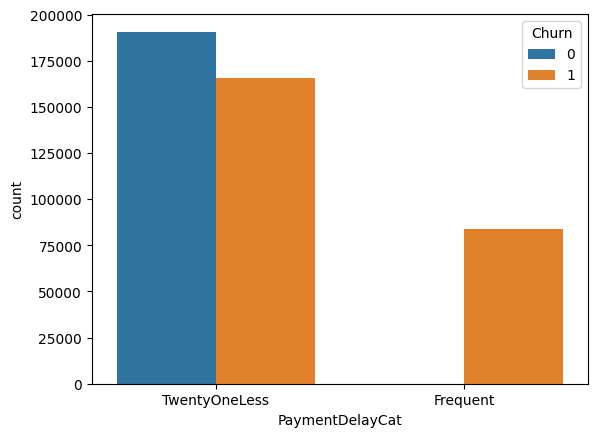

In [227]:
sns.countplot(train, x='PaymentDelayCat',hue='Churn')

### Subscription Type

<Axes: xlabel='SubscriptionType', ylabel='count'>

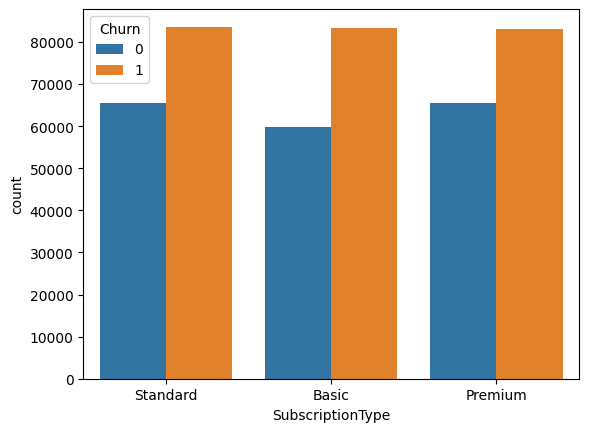

In [228]:
sns.countplot(train, x='SubscriptionType',hue='Churn')

Nothing super obvious there.

### Contract Length

<Axes: xlabel='ContractLength', ylabel='count'>

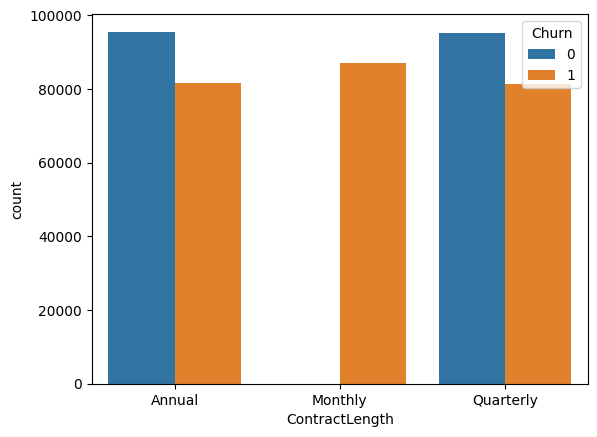

In [229]:
sns.countplot(train,x='ContractLength',hue='Churn')

Another strong indicator with monthly contracts where churners are overwhelmingly represented. There is most likely a systemic reason for that, possibly related to the construction of the dataset itself (it is hard to imagine that none of the loyal customers have a monthly contract).

### Total Spend

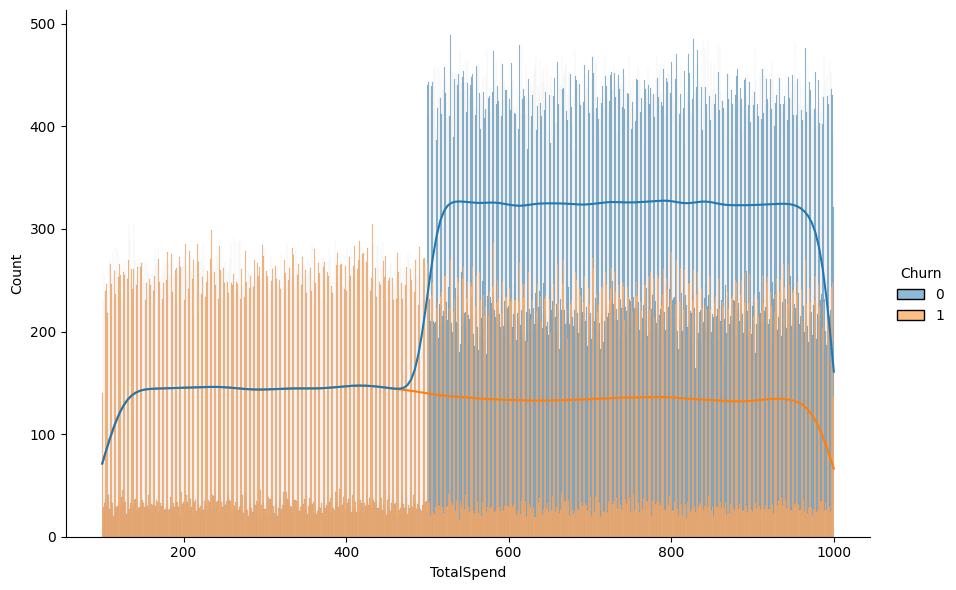

In [230]:
num_bins=int((train.TotalSpend.max()-train.TotalSpend.min())*2)
p = sns.displot(train, x='TotalSpend', hue='Churn', kde=True, height=6, aspect=1.5, multiple='stack', bins=num_bins)
p.fig.set_dpi(100)

Spend is rather uniform among churners, but loyal customers have a spend that is very clearly above $500.

In [231]:
bins = [0,500,1000.5]
train['TotalSpendCat']=pd.cut(train.TotalSpend, bins=bins, labels=['500Less','More'], right=False)
test['TotalSpendCat']=pd.cut(test.TotalSpend, bins=bins, labels=['500Less','More'], right=False)

In [232]:
churn_by_cat = train.groupby('TotalSpendCat').Churn.value_counts(normalize=True)
print(churn_by_cat)

TotalSpendCat  Churn
500Less        1        1.000000
               0        0.000000
More           0        0.587113
               1        0.412887
Name: proportion, dtype: float64


<Axes: xlabel='TotalSpendCat', ylabel='count'>

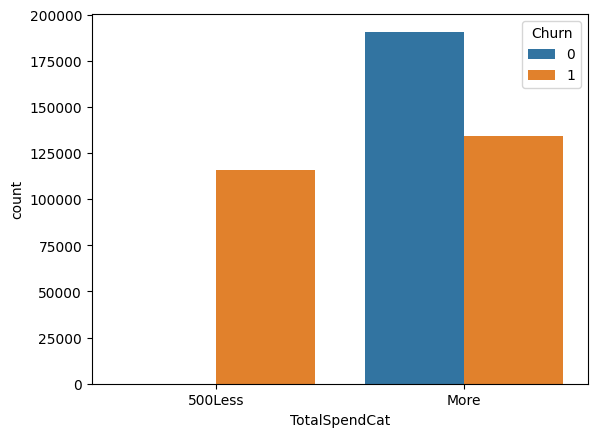

In [233]:
sns.countplot(train, x='TotalSpendCat',hue='Churn')

### Last Interaction

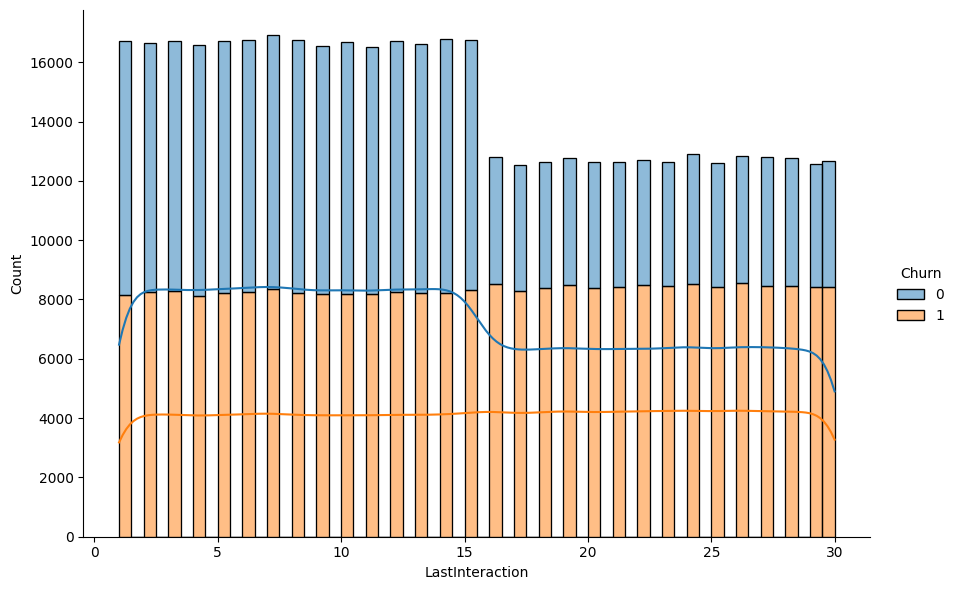

In [234]:
num_bins=int((train.LastInteraction.max()-train.LastInteraction.min())*2)
p = sns.displot(train, x='LastInteraction', hue='Churn', kde=True, height=6, aspect=1.5, multiple='stack', bins=num_bins)
p.fig.set_dpi(100)

Another cut at value 16. Unit is not clear to me, maybe number of months? Having less recent interactions would increase odds of churning?

In [235]:
bins = [0,16,30.5]
train['LastInteractionCat']=pd.cut(train.LastInteraction, bins=bins, labels=['16Less','More'], right=False)
test['LastInteractionCat']=pd.cut(test.LastInteraction, bins=bins, labels=['16Less','More'], right=False)

In [236]:
churn_by_cat = train.groupby('LastInteractionCat').Churn.value_counts(normalize=True)
print(churn_by_cat)

LastInteractionCat  Churn
16Less              0        0.507326
                    1        0.492674
More                1        0.664976
                    0        0.335024
Name: proportion, dtype: float64


<Axes: xlabel='LastInteractionCat', ylabel='count'>

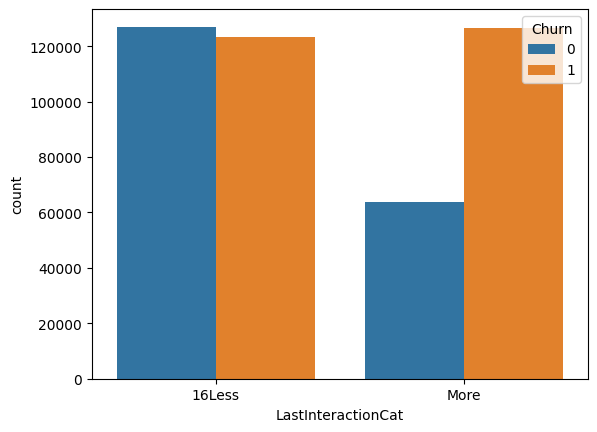

In [237]:
sns.countplot(train, x='LastInteractionCat',hue='Churn')

## Interim data staging

In [238]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440832 entries, 0 to 440831
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   CustomerID          440832 non-null  int64   
 1   Age                 440832 non-null  float64 
 2   Gender              440832 non-null  object  
 3   Tenure              440832 non-null  float64 
 4   UsageFrequency      440832 non-null  float64 
 5   SupportCalls        440832 non-null  float64 
 6   PaymentDelay        440832 non-null  float64 
 7   SubscriptionType    440832 non-null  object  
 8   ContractLength      440832 non-null  object  
 9   TotalSpend          440832 non-null  float64 
 10  LastInteraction     440832 non-null  float64 
 11  Churn               440832 non-null  int64   
 12  AgeCat              440832 non-null  category
 13  TenureCat           440832 non-null  category
 14  UsageFrequencyCat   440832 non-null  category
 15  SupportCallsCat  

In [239]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64371 entries, 0 to 64370
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CustomerID          64371 non-null  int64   
 1   Age                 64371 non-null  float64 
 2   Gender              64371 non-null  object  
 3   Tenure              64371 non-null  float64 
 4   UsageFrequency      64371 non-null  float64 
 5   SupportCalls        64371 non-null  float64 
 6   PaymentDelay        64371 non-null  float64 
 7   SubscriptionType    64371 non-null  object  
 8   ContractLength      64371 non-null  object  
 9   TotalSpend          64371 non-null  float64 
 10  LastInteraction     64371 non-null  float64 
 11  Churn               64371 non-null  int64   
 12  AgeCat              64370 non-null  category
 13  TenureCat           64371 non-null  category
 14  UsageFrequencyCat   64371 non-null  category
 15  SupportCallsCat     64371 non-null  

In [241]:
train.to_parquet('data/training_3.pq', index=False)
test.to_parquet('data/testing_3.pq', index=False)

Next: [Predictive Modelling](./2-PredictiveModel-NoBinning.ipynb) - 